# Unsupervised Supervised Assignment


## Question: Select any dataset available on the internetand then perform a detailed Exploratory Data Analysis (EDA) and then you have to demonstrate the application of two models where one is supervised and other is unsupervised and you have to create a detailed report on the tasks performed mentioning the reason why did you perform it and also you must train different models and calculate model metrics and mention the final conclusion.
Below are the examples tasks to be performed on your dataset as per requirements – 

1.Load the Data

2.Data Analysis

3.Data Cleaning

4.Visualizing and Understanding the Data

5.Find the Correlation Matrix

6.Hypothesis Testing

7.Feature Engineering/Scaling

8.Split the Data

9.Train Multiple Models using both Supervised and Unsupervised Learning Algorithms (custom from scratch or scikit learn)

10.Evaluate the Models

11.Cross Validation and Fine Tuning

12.Model Experimentation and Tracking using mlflow(optional)

13.Ensemble Learning 

14.Training the final best model and saving results with metrics.

15.Model Deployment using flask.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
df = pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.shape

(4981, 11)

# Data Cleaning

In [6]:
# Identifying Duplicate values
duplicate_rows = df[df.duplicated()]
duplicate_rows

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [7]:
# Sum of duplicate values
df.duplicated().sum()

0

In [8]:
# Checking for the null values.
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

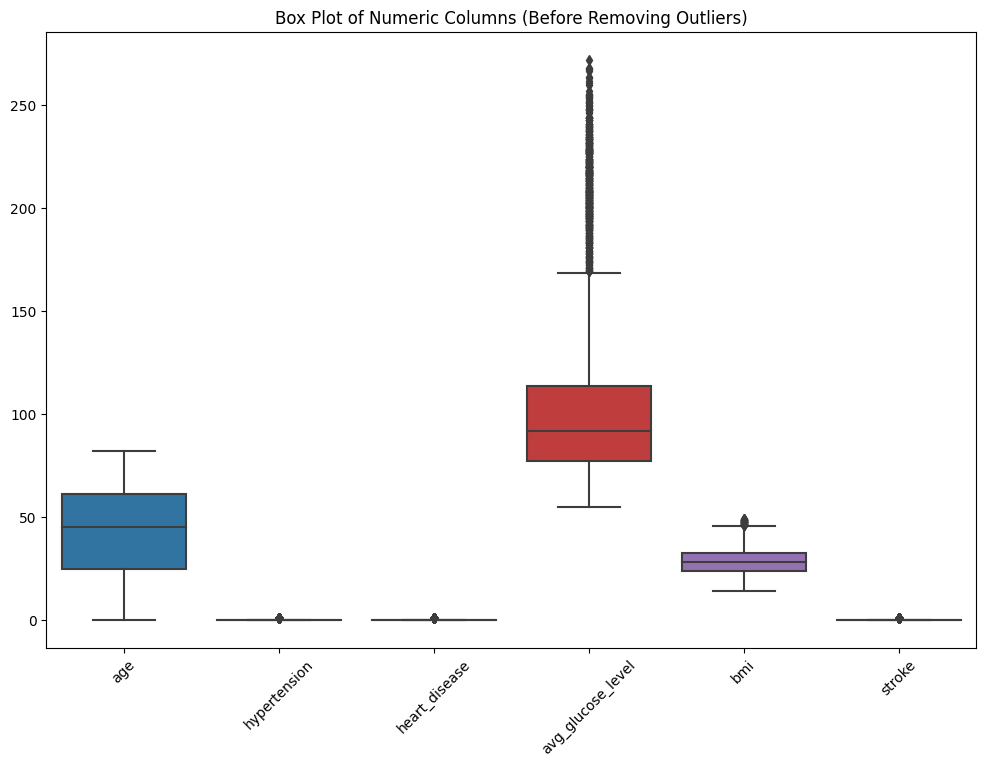

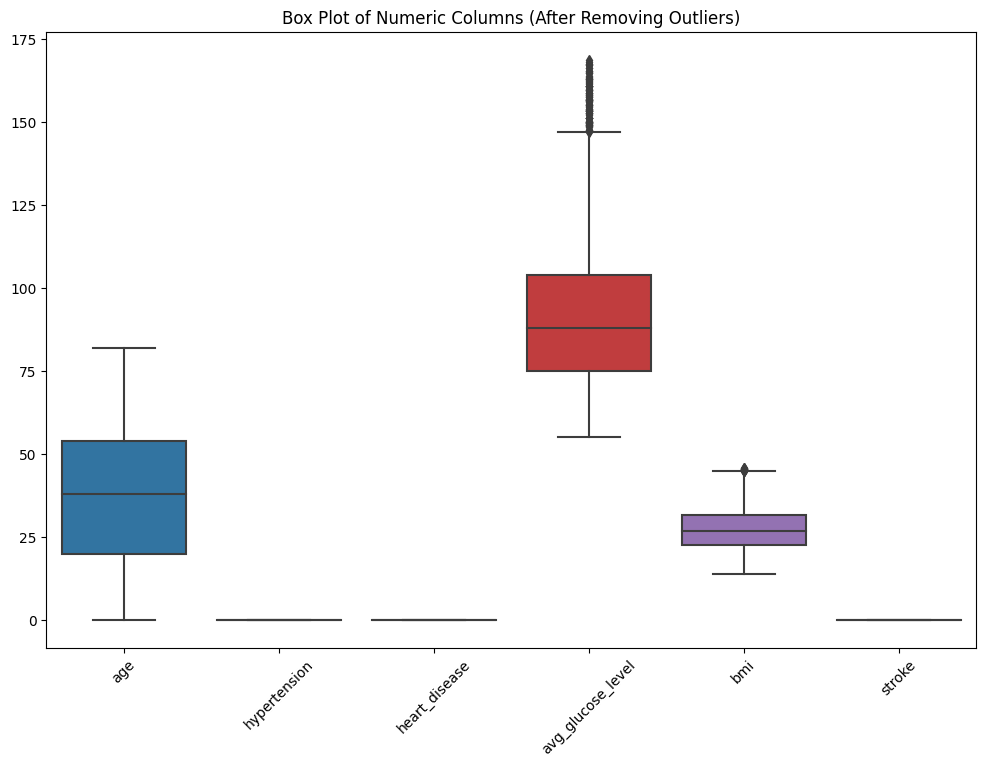

In [9]:
#Identifying the Outliers
num_cols = ['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']
#Box plot for outliers
plt.figure(figsize= (12, 8))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

# Remove outliers from the dataset
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot for each numeric column after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[num_cols])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()

# Feature Encoding

In [10]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['work_type']=le.fit_transform(df['work_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [11]:
df["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

# Exploratory Data Analysis

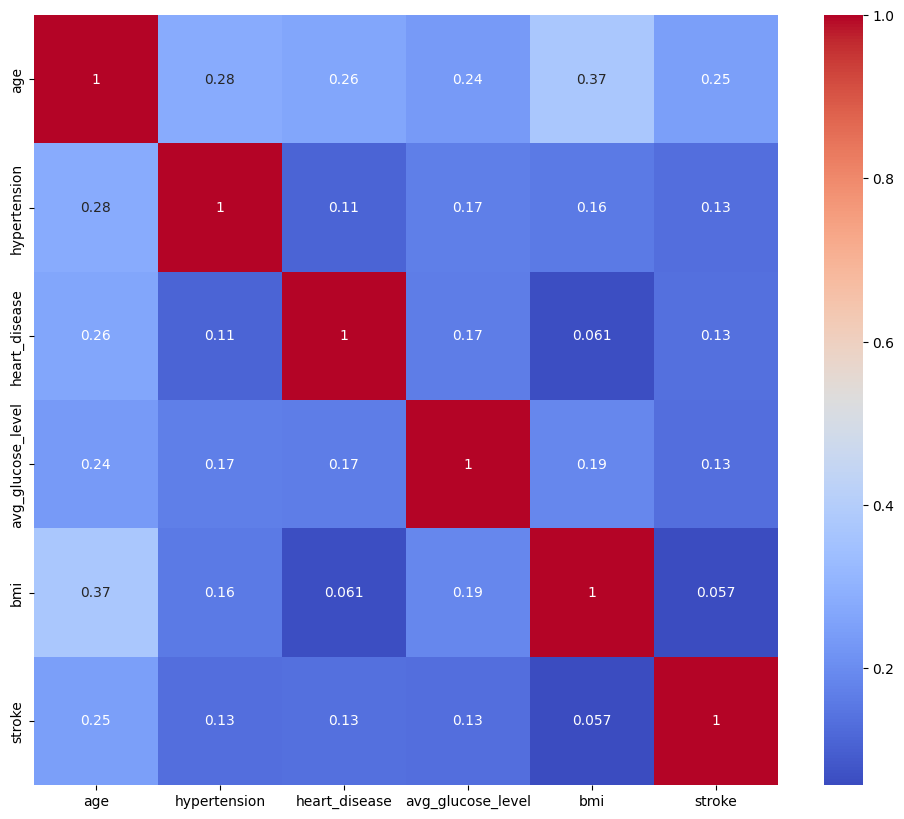

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(),cmap='coolwarm',annot=True);

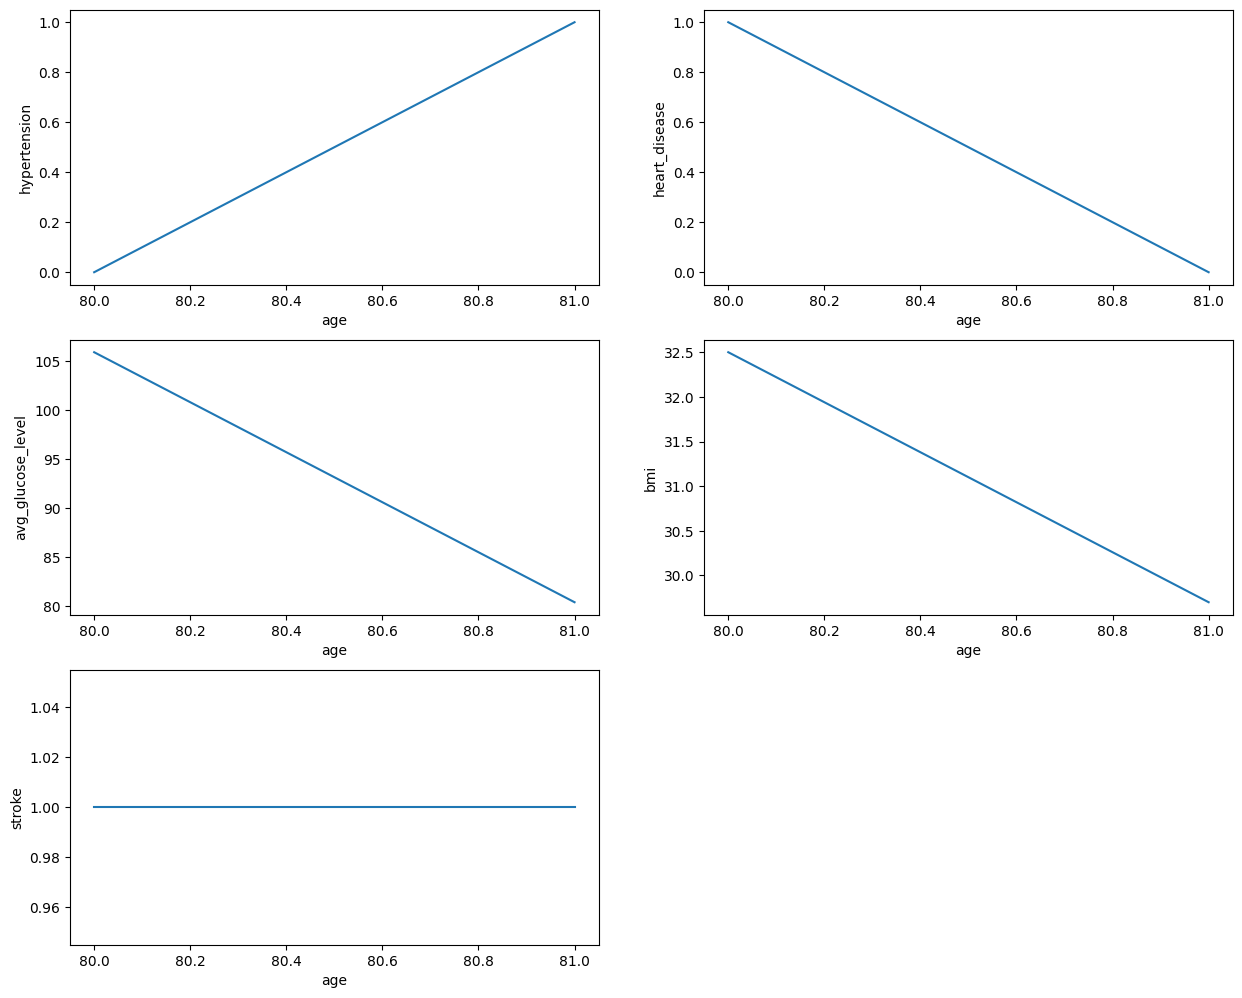

In [13]:
#line plot analysis 
cols=['hypertension','heart_disease','avg_glucose_level','bmi','stroke']

x=df.iloc[[1,8]]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='age',y=col,data=x)

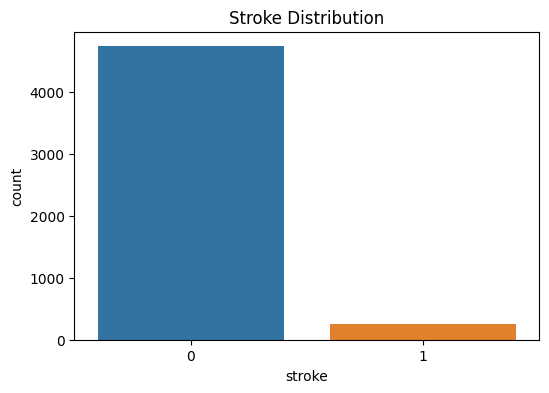

In [14]:
# Count plot of stroke distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Stroke Distribution')
plt.show()

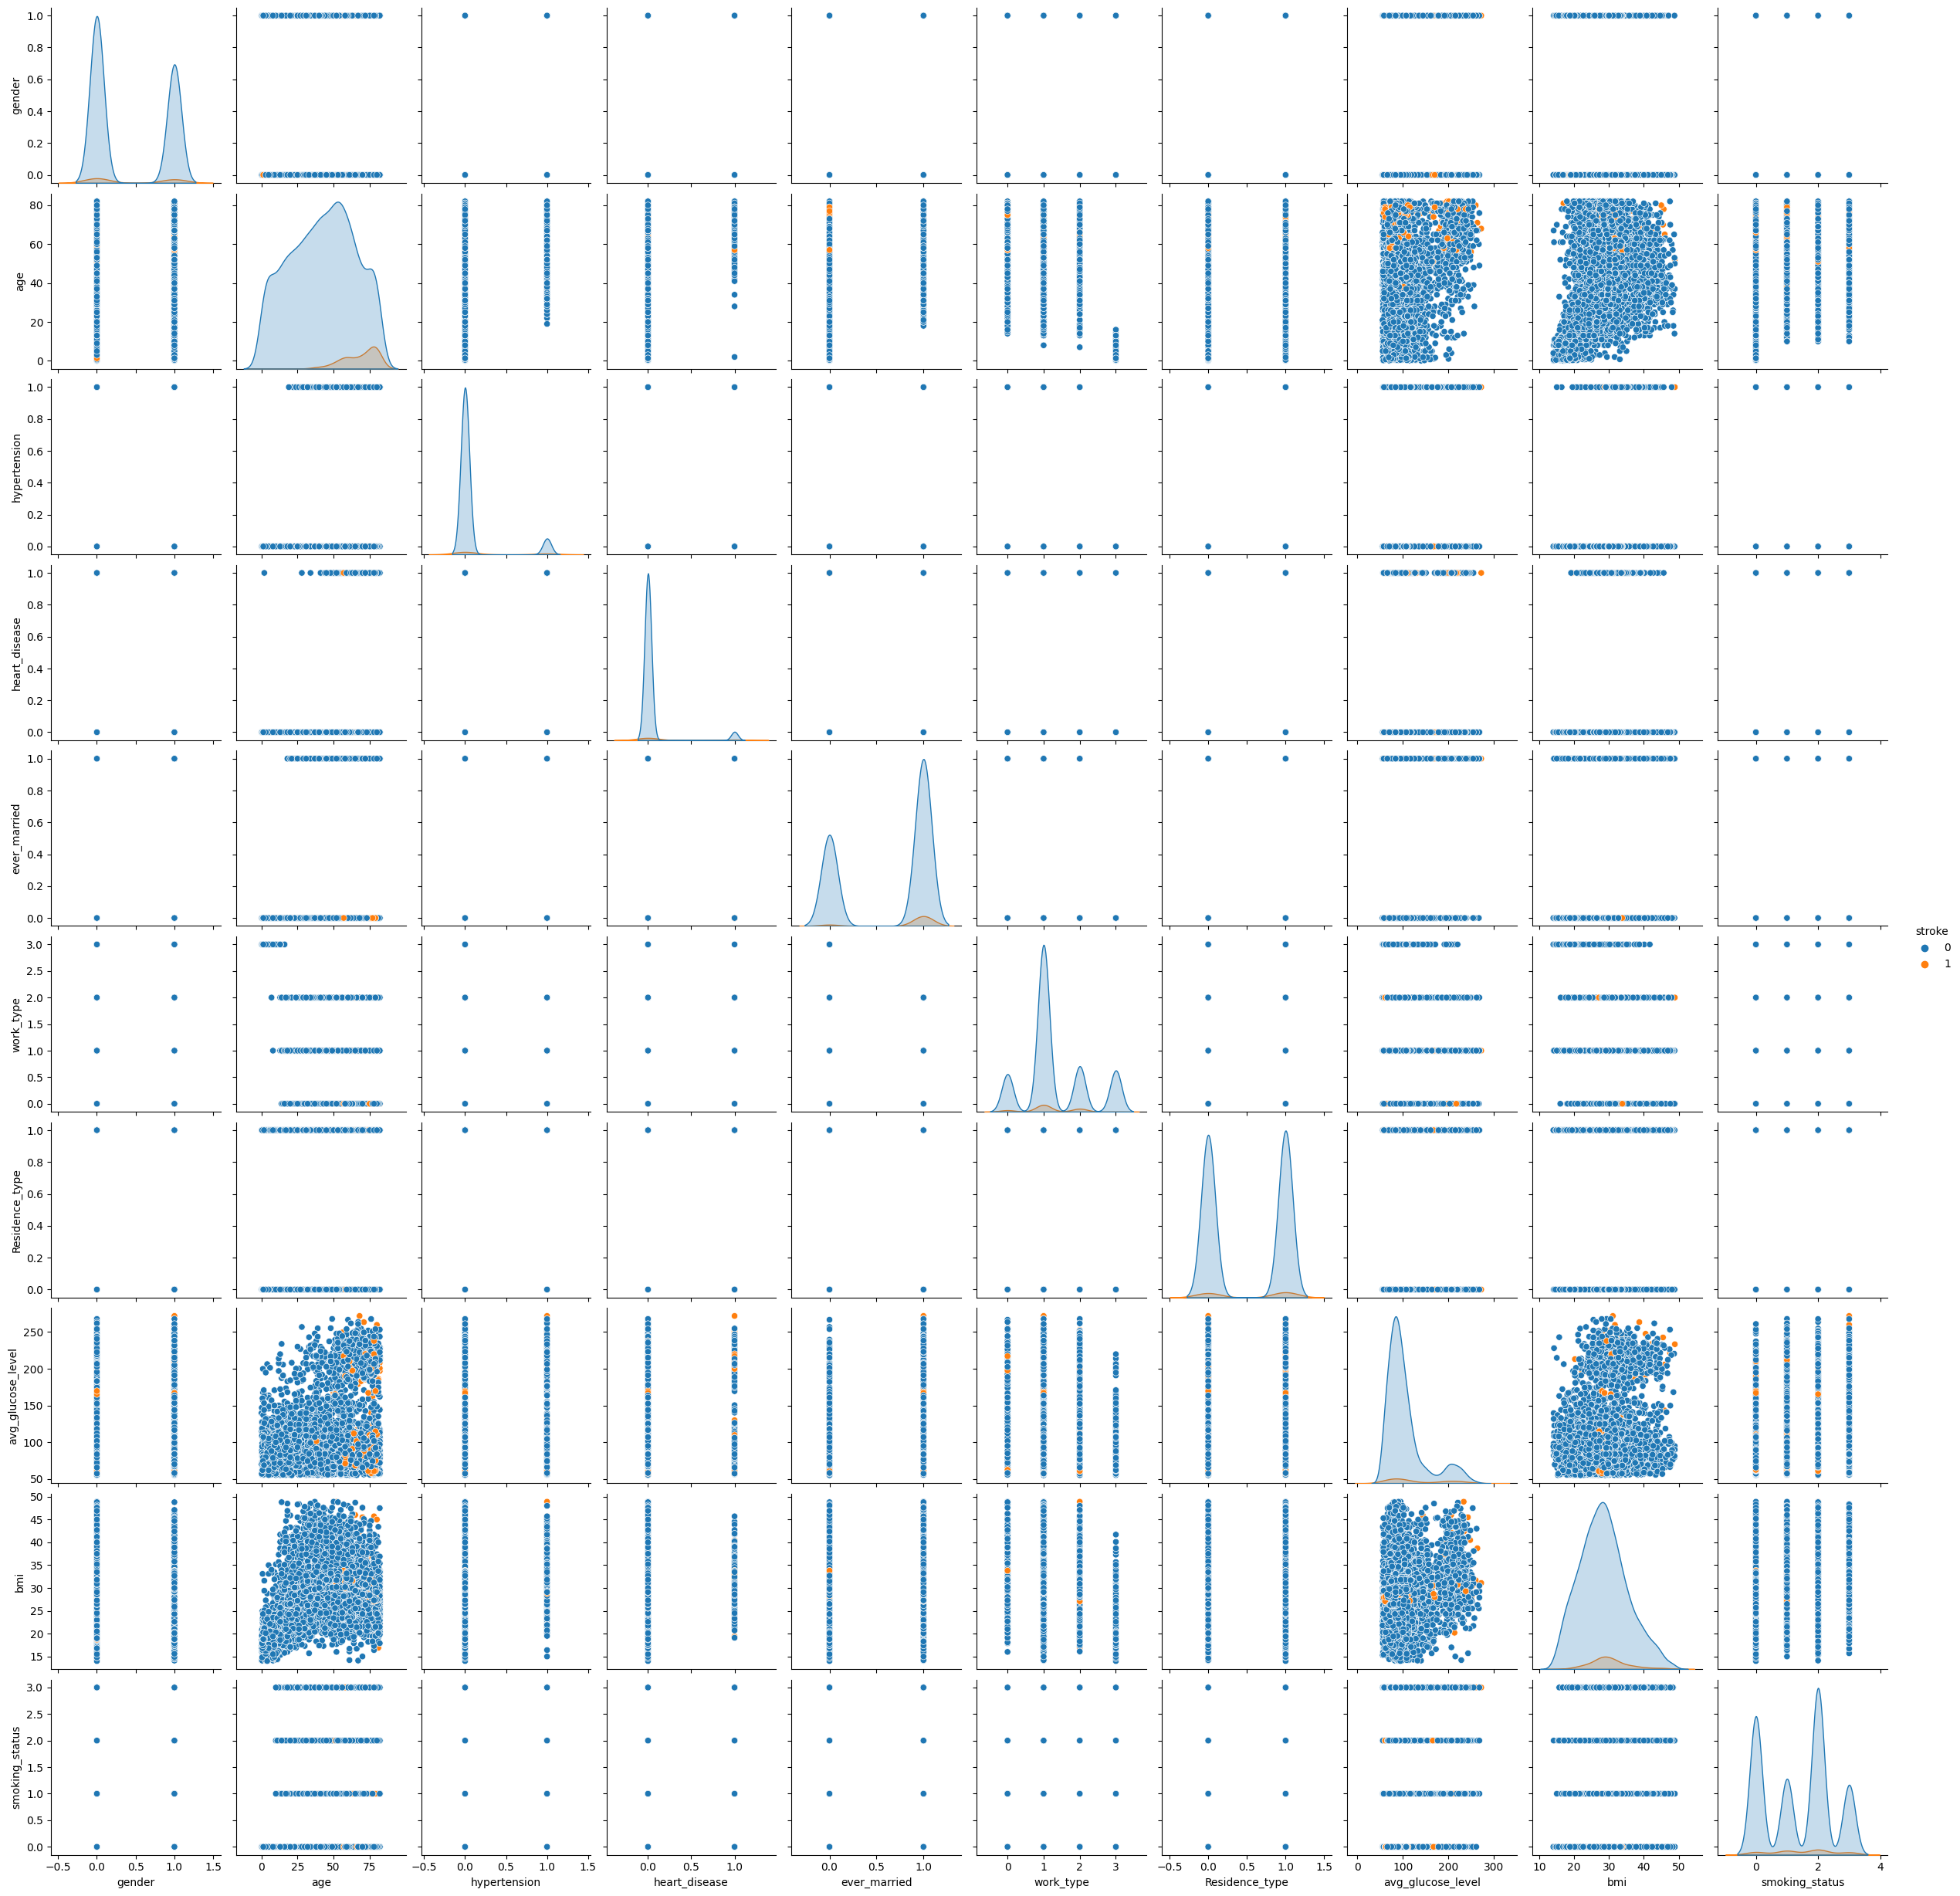

In [15]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='stroke', diag_kind='kde')
plt.show()

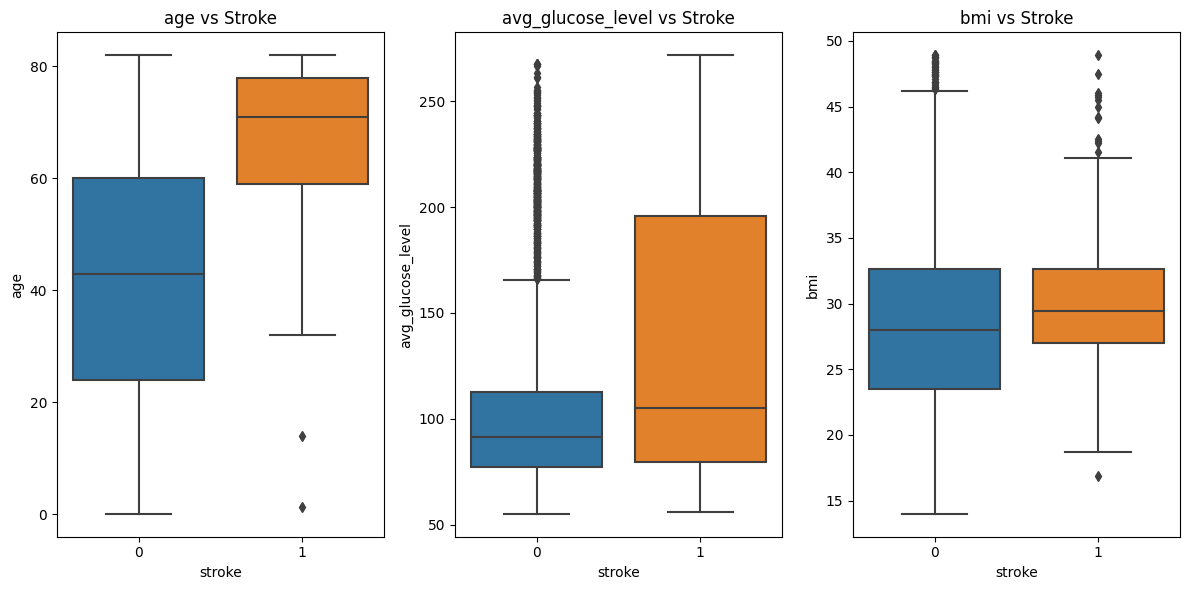

In [16]:
# Box plot to visualize the distribution of numerical variables with respect to stroke
plt.figure(figsize=(12, 6))
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'{col} vs Stroke')
plt.tight_layout()
plt.show()

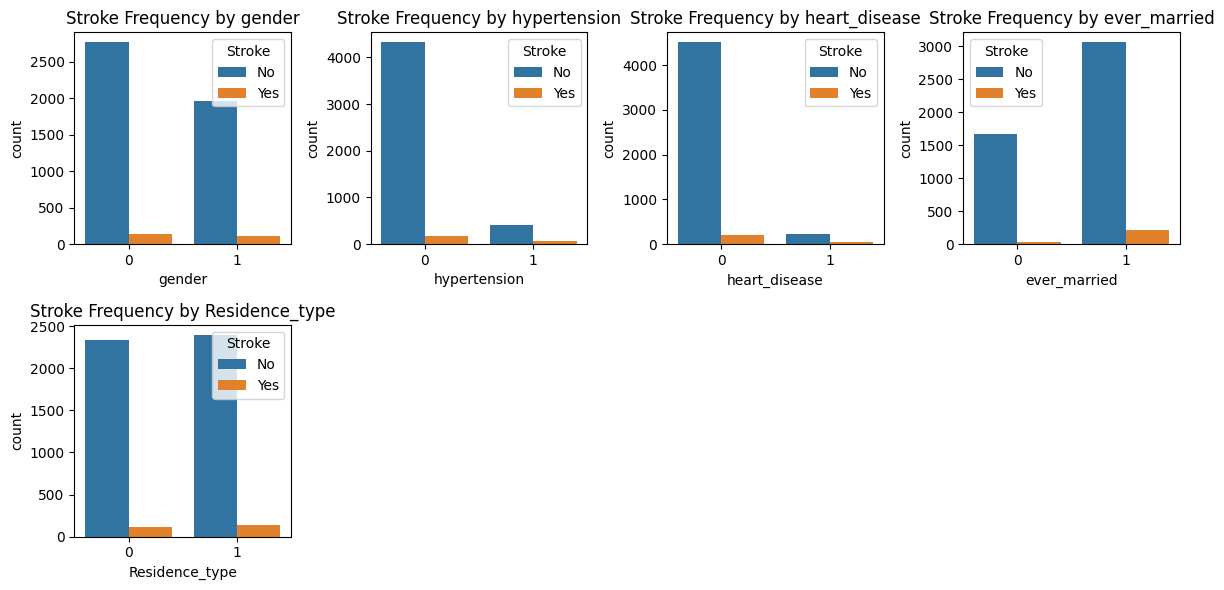

In [17]:
# Bar plot to visualize stroke frequency based on categorical variables
plt.figure(figsize=(12, 6))
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',  'Residence_type']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f'Stroke Frequency by {col}')
    plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Imbalancing Technique

In [18]:
x = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'bmi','smoking_status']]
y=df['stroke']

In [19]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x,y=s.fit_resample(x,y)

In [20]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Model Training

In [21]:
# Splitting the Data
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2)

# Supervised Learning

In [22]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix

# 1. Logistic Regression

In [23]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred1 = lg.predict(x_test)
y_pred1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [25]:
#Checking the accuracy.
accuracy_score(y_pred1,y_test)

0.795142555438226

In [26]:
cm = confusion_matrix
cm(y_pred1,y_test)

array([[747, 157],
       [231, 759]], dtype=int64)

# 2. Support Vector Machine (SVM)

In [27]:
svm=SVC(kernel = 'linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred2 = svm.predict(x_test)

In [29]:
#Checking the accuracy.
accuracy_score(y_pred2,y_test)

0.7977824709609292

In [30]:
cm(y_pred2,y_test)

array([[741, 146],
       [237, 770]], dtype=int64)

# 3. K-Nearest Neighbors(KNN)

In [31]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred3 = classifier.predict(x_test)
y_pred3

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [33]:
#Checking the accuracy.
accuracy_score(y_pred3,y_test)

0.8817317845828934

In [34]:
cm(y_pred3,y_test)

array([[773,  19],
       [205, 897]], dtype=int64)

# 4. Random Forest 

In [35]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
y_pred4 = rf.predict(x_test)

In [37]:
#Checking the accuracy.
accuracy_score(y_pred4,y_test)

0.9334741288278775

In [38]:
cm(y_pred4,y_test)

array([[892,  40],
       [ 86, 876]], dtype=int64)

# 5. Ensemble Technique

In [39]:
from sklearn.ensemble import VotingClassifier
ab=VotingClassifier(estimators=[("LogisticRegression",lg),("Support Vector Machine",svm),("K-NearestNeighbors",classifier),("Random Forest",rf)])
ab

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('Support Vector Machine', SVC(kernel='linear')),
                             ('K-NearestNeighbors', KNeighborsClassifier()),
                             ('Random Forest', RandomForestClassifier())])

In [40]:
ab.fit(x_train,y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                             ('Support Vector Machine', SVC(kernel='linear')),
                             ('K-NearestNeighbors', KNeighborsClassifier()),
                             ('Random Forest', RandomForestClassifier())])

In [41]:
y_pred5=ab.predict(x_test)
y_pred5

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [42]:
#Checking the accuracy.
accuracy_score(y_test,y_pred4)

0.9334741288278775

In [43]:
cm(y_pred5,y_test)

array([[845, 145],
       [133, 771]], dtype=int64)

In [44]:
print('Accuracy Score of all models')
print("Models             \t ","Accuracy_score")
print("Logistic Regression\t ",accuracy_score(y_pred1,y_test)*100)
print("SVM                \t ",accuracy_score(y_pred2,y_test)*100)
print("KNN                \t ",accuracy_score(y_pred3,y_test)*100)
print("Random Forest      \t ",accuracy_score(y_pred4,y_test)*100)
print("Ensemble Technique \t ",accuracy_score(y_pred5,y_test)*100)

Accuracy Score of all models
Models             	  Accuracy_score
Logistic Regression	  79.5142555438226
SVM                	  79.77824709609293
KNN                	  88.17317845828934
Random Forest      	  93.34741288278775
Ensemble Technique 	  85.32206969376979


# Unsupervised Learning

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-Means Clustering

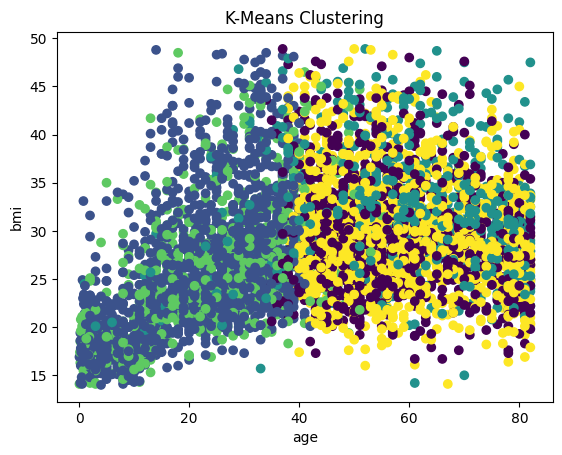

In [46]:
# Drop Stroke column as they are not used for clustering
X = df.drop(columns=['stroke'])

# Perform K-Means clustering with k=3 (you can change the number of clusters as needed)
kmeans = KMeans(n_clusters=5,n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming PM2.5 and PM10 are plotted on a scatter plot)
plt.scatter(df['age'], df['bmi'], c=df['cluster'], cmap='viridis')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('K-Means Clustering')
plt.show()

## Hence, Random Forest is the best model with highest Accuracy. So, we will use Random Forest as the Classification Model.

# Cross Validation and Fine Tuning

In [47]:
from sklearn.model_selection import GridSearchCV , cross_val_score
rf = RandomForestClassifier()

# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
}

# Initialize GridSearchCV with the Random Forest model and hyperparameters grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform cross-validation and find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.89651531 0.94453249 0.9360803  0.9429477  0.93977813]


# Training the best model

In [48]:
#Training the best model for the deployment.
Best_Model_RF = RandomForestClassifier()
Best_Model_RF.fit(x_train,y_train)
Best_Model_RF_predict = Best_Model_RF.predict(x_test)

# Model Evaluation:
# Test Data prediction

ac_train = accuracy_score(y_test,y_pred4)

# Training Data Prediction

ac_test = accuracy_score(y_train, Best_Model_RF.predict(x_train))

# RESULT

print("Evaluating on Training Data:")
print("Models                   \tAccuracy")
print("Random Forest            \t{0:.4f}".format(ac_train))
print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tAccuracy")
print("Random Forest            \t{0:.4f}".format(ac_test))

Evaluating on Training Data:
Models                   	Accuracy
Random Forest            	0.9335


Evaluating on Testing Data:
Models                   	Accuracy
Random Forest            	1.0000


# Model Deployment

In [49]:
#Removing unnecessary columns.
df = df.drop(columns = ['avg_glucose_level',"cluster"], axis=1)

In [50]:
# creating a pickle file for the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

df = df

# Separate features (x) and target (y)
x = df.drop(columns=['stroke'], axis=1)
y = df['stroke']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestClassifier
Best_Model_RF = RandomForestClassifier()
Best_Model_RF.fit(x_train, y_train)

# Make predictions on the test data
Best_Model_RF_predict = Best_Model_RF.predict(x_test)

# Save the trained model using pickle
with open('best_model_rf.pickle', 'wb') as file:
    pickle.dump(Best_Model_RF, file)